<a href="https://colab.research.google.com/github/jean7-7-7/Proyectos/blob/main/Certification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Validation and Cleaning Steps
- Initial Data Assessment:

The dataset was loaded into a pandas DataFrame for analysis.

An initial check for missing values (NaN).

Finding: The revenue column was identified as having 1,074 missing values.

- Identification of Data Inconsistencies:

A check for unexpected or inconsistent values was conducted by examining the unique values in each column.

Findings:

sales_method column: Contained inconsistent values "em + call" and "email" alongside the expected "Email", "Email + Call", and "Call".

years_as_customer column: Contained values (e.g., 63, 47) that were implausibly high, considering the company was founded in 1984 (a maximum plausible value would be the current year minus 1984).

In [63]:
import pandas as pd

dt= pd.read_csv("/content/product_sales.csv")

# We performed a description of the distribution of each column; the "revenue" column seems to have missing values
print(dt.isna().sum())

# We are looking for unexpected values; There seem to be values above what is expected in "years_as_customer" and also inconsistent values were observed in the "sales_method" column.
print(dt["week"].unique())
print(dt["sales_method"].unique())
print(dt["customer_id"].unique())
print(dt["nb_sold"].unique())
print(dt["revenue"].unique())
print(dt["years_as_customer"].unique())
print(dt["nb_site_visits"].unique())
print(dt["state"].unique())

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64
[2 6 5 4 3 1]
['Email' 'Email + Call' 'Call' 'em + call' 'email']
['2e72d641-95ac-497b-bbf8-4861764a7097'
 '3998a98d-70f5-44f7-942e-789bb8ad2fe7'
 'd1de9884-8059-4065-b10f-86eef57e4a44' ...
 '839653cb-68c9-48cb-a097-0a5a3b2b298b'
 'e4dad70a-b23b-407c-8bd3-e32ea00fae17'
 '4e077235-7c17-4054-9997-7a890336a214']
[10 15 11  9 13  8 12  7 14 16]
[   nan 225.47  52.55 ...  44.34  45.01  64.9 ]
[ 0  1  6  3 10  9  7  4  2 20  8  5 17 36 15 14 19 13 12 11 30 24 22 18
 26 23 32 16 39 25 33 21 31 27 34 28 29 35 38 37 63 47]
[24 28 26 25 22 31 23 30 21 27 32 29 20 18 19 35 16 17 33 36 34 15 37 14
 13 12 41]
['Arizona' 'Kansas' 'Wisconsin' 'Indiana' 'Illinois' 'Mississippi'
 'Georgia' 'Oklahoma' 'Massachusetts' 'Missouri' 'Texas' 'New York'
 'Maryland' 'California' 'Tennessee' 'Pe

- Data Cleaning Actions:

Handling Missing Values (revenue):

Action: The missing values in the revenue column were imputed (filled) using the mean value of the existing revenue data.

Correcting Implausible Values (years_as_customer):

Action: Rows where the years_as_customer value exceeded the number of years since the company"s founding (1984) were filtered out and removed from the dataset.

Method used: dt = dt[dt["years_as_customer"] <= (current_year - 1984)] (The code uses datetime.now().year to get the current year dynamically).

Standardizing Categorical Values (sales_method):

Action: The inconsistent entries in the sales_method column were replaced to standardize the categories.


Result: The column now contains only the three expected, consistent categories: "Email", "Email + Call", and "Call".

- Final Validation Check:

A final check for missing values (dt.isna().sum()) was performed after the cleaning steps.

Result: Confirmed that there are zero missing values in any column of the cleaned dataset. The unique values for sales_method and years_as_customer were also printed to confirm the corrections.




In [64]:
# We replace the rows with missing values in the "revenue" column with an average value.

dt.fillna(dt["revenue"].mean(), inplace= True)

# We correct the years that are above what is expected.
from datetime import datetime
dt= dt[dt["years_as_customer"]<=datetime.now().year - 1984]

# We replace the inconsistent values in the "sales_method" column

dt["sales_method"] = dt["sales_method"].replace({"em + call": "Email + Call"})
dt["sales_method"] = dt["sales_method"].replace({"email": "Email"})

# We check for missing values again after filling them.
print("Missing values after cleaning:")
print(dt.isna().sum())

# We check the unique values in 'sales_method' and 'years_as_customer' to confirm the corrections.
print("\nUnique values in 'sales_method' after cleaning:")
print(dt["sales_method"].unique())

print("\nUnique values in 'years_as_customer' after cleaning:")
print(dt["years_as_customer"].unique())

Missing values after cleaning:
week                 0
sales_method         0
customer_id          0
nb_sold              0
revenue              0
years_as_customer    0
nb_site_visits       0
state                0
dtype: int64

Unique values in 'sales_method' after cleaning:
['Email' 'Email + Call' 'Call']

Unique values in 'years_as_customer' after cleaning:
[ 0  1  6  3 10  9  7  4  2 20  8  5 17 36 15 14 19 13 12 11 30 24 22 18
 26 23 32 16 39 25 33 21 31 27 34 28 29 35 38 37]


# we proceed to create graphics in search of patterns

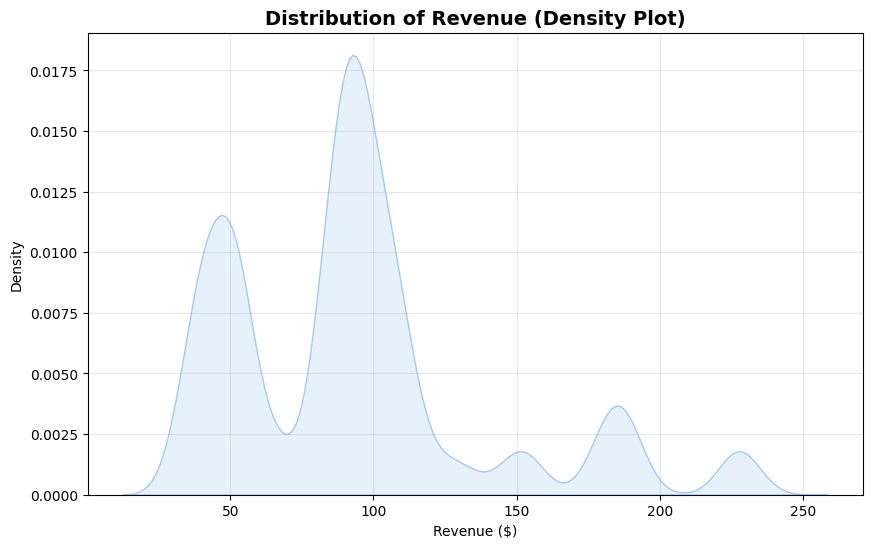

In [65]:
# Create and configure a density plot for the revenue column.
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")
sns.set_palette("pastel")


plt.figure(figsize=(10, 6))
sns.kdeplot(data=dt, x="revenue", fill=True)


plt.title("Distribution of Revenue (Density Plot)", fontsize=14, fontweight="bold")
plt.xlabel("Revenue ($)")
plt.ylabel("Density")
plt.grid(True, alpha=0.3)

plt.show()

In [66]:
#It seems most purchases are between $65 and $100... what is the percentage of this argument?

lower_limit = 65
upper_limit = 100

# Create a boolean mask: "True" for values within the range
range_mask = (dt["revenue"] >= lower_limit) & (dt["revenue"] <= upper_limit)

# Count how many transactions satisfy the condition
in_range_count = range_mask.sum()

total = len(dt)


# Calculate the percentage
percentage_in_range= (in_range_count / total) * 100

# 6. Print the results clearly
print(f"Transactions between ${lower_limit} and ${upper_limit}: {in_range_count}")
print(f"Exact percentage: {percentage_in_range:.2f}%")

Transactions between $65 and $100: 5755
Exact percentage: 38.37%


# **Finding: it is observed that around 38% of the profits come from sales ranging from 65 to 100 $**

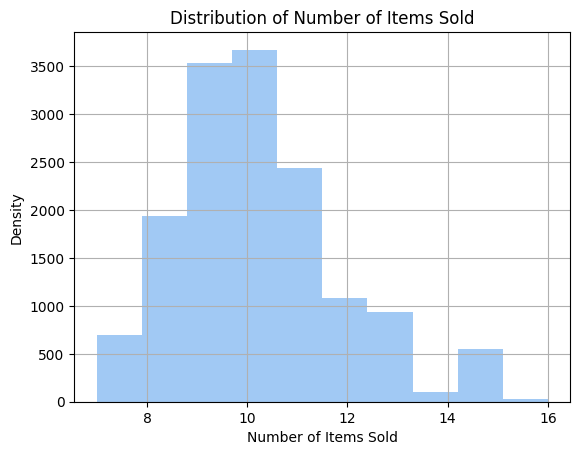

The number of items sold between 9 and 10: 7210
Exact percentage: 38.37%


In [67]:
dt["nb_sold"].hist()
plt.title("Distribution of Number of Items Sold")
plt.xlabel("Number of Items Sold")
plt.ylabel("Density")
plt.show()


#It seems most purchases are between $65 and $100... what is the percentage of this argument?

lower_limit_sold = 9
upper_limit_sold = 10

# Create a boolean mask: "True" for values within the range
range_mask_sold = (dt["nb_sold"] >= lower_limit_sold) & (dt["nb_sold"] <= upper_limit_sold)

# Count how many transactions satisfy the condition
in_range_count_sold = range_mask_sold.sum()

total_sold = len(dt)


# Calculate the percentage
percentage_in_range_sold= (in_range_count / total) * 100

# 6. Print the results clearly
print(f"The number of items sold between {lower_limit_sold} and {upper_limit_sold}: {in_range_count_sold}")
print(f"Exact percentage: {percentage_in_range_sold:.2f}%")

# Around 48% of sales are between 9 and 10 products

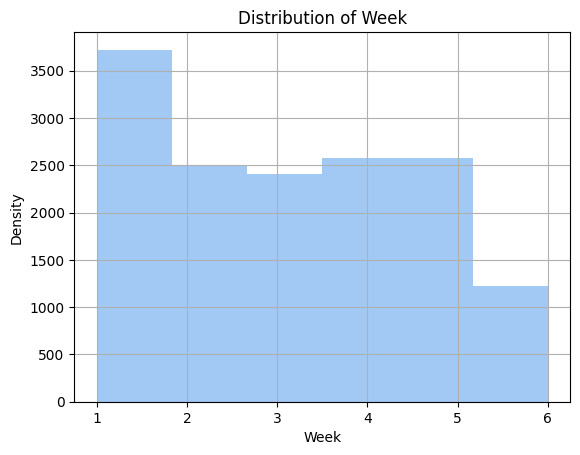

In [68]:
dt["week"].hist(bins=6)
plt.title("Distribution of Week")
plt.xlabel("Week")
plt.ylabel("Density")
plt.show()

### The most interested or loyal customers react quickly to the launch. This shows that there is a group of "early adopters" or buyers who care about being the first to try the new line

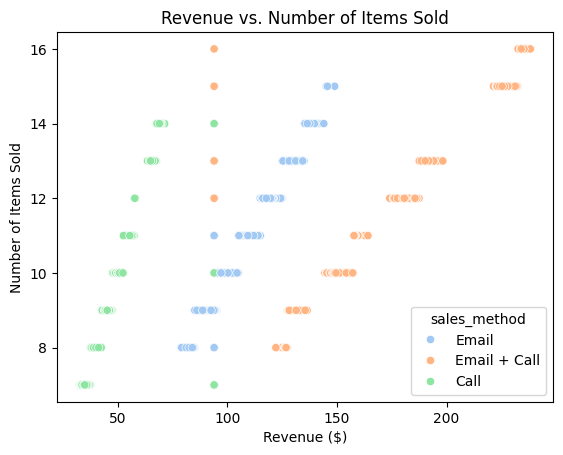

In [69]:
sns.scatterplot(data=dt, x="revenue", y="nb_sold",hue="sales_method")
plt.title("Revenue vs. Number of Items Sold")
plt.xlabel("Revenue ($)")
plt.ylabel("Number of Items Sold")
plt.show()

## A clear trend can be observed where the highest revenues and the largest number of items sold primarily come from "Email + Call" sales.

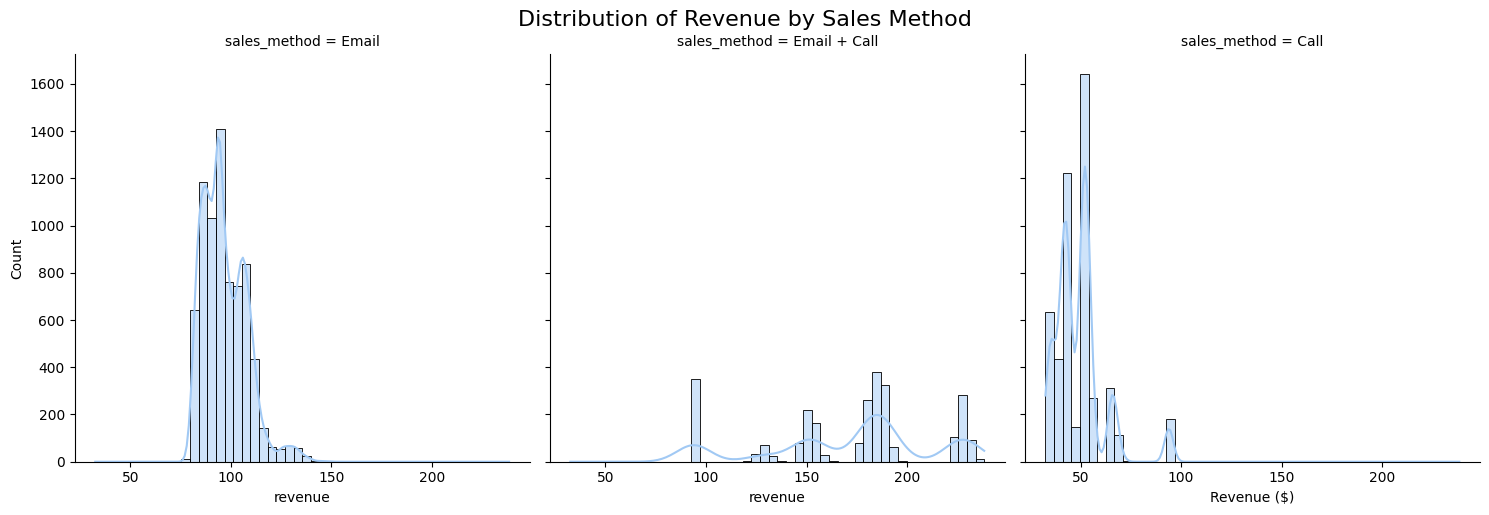

sales_method
Call            4961
Email           7465
Email + Call    2572
Name: revenue, dtype: int64


In [70]:
sns.displot(data=dt, x="revenue", col="sales_method", kde=True)
plt.suptitle("Distribution of Revenue by Sales Method", fontsize=16, y=1.02)
plt.xlabel("Revenue ($)")
plt.ylabel("Density")
plt.show()

print(dt.groupby("sales_method")["revenue"].count())

### Although "Email + Call" has a lower count than the others, it generates a large amount of profit and item sales.

# **Metrics**

In [71]:
# Digital efficiency, web interaction profitability

# Calculate revenue per visit
dt["rev_per_visit"] = dt["revenue"] / dt["nb_site_visits"]

# Group by sales method and get metrics
summary = (dt.groupby("sales_method")["rev_per_visit"].agg(mean="mean").reset_index())

print(summary)

   sales_method      mean
0          Call  2.037432
1         Email  3.965147
2  Email + Call  6.456232


### On average, revenue per web visit is higher for "email + call" customers

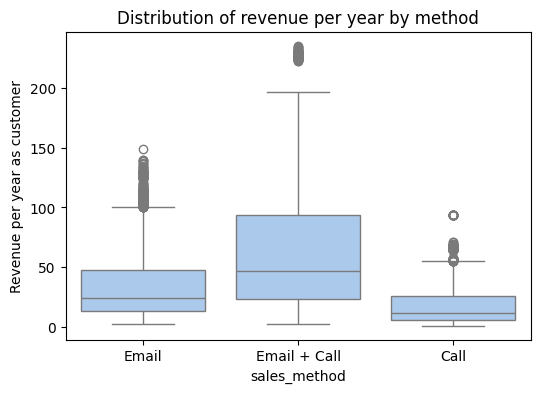

In [72]:
# 2. Create the new metric
dt["rev_per_year"] = dt["revenue"] / dt["years_as_customer"]

# 3. Global statistics
global_mean = dt["rev_per_year"].mean()

plt.figure(figsize=(6,4))
sns.boxplot(
    data=dt,
    x="sales_method",
    y="rev_per_year"
)
plt.ylabel("Revenue per year as customer")
plt.title("Distribution of revenue per year by method")
plt.show()

### This method shows the highest median revenue per year as a customer, as well as a wider interquartile range, suggesting a greater variability in revenue for customers acquired through this method. It also has some outliers with very high revenue per year.

---

# **Key Conclusions**:


Customer distribution by method:

The most used method was Email, followed by Call and then Email + Call.

This suggests the team initially prioritized lower-effort methods.

Revenue by method:

Email + Call generated the highest average revenue per customer, followed by Call and then Email.

Although Email reached more customers, its average revenue was significantly lower.

Trend over time:

Revenue from Email + Call and Call remained stable or showed a positive trend over the weeks.

Email showed a drop in revenue after the first week, suggesting a diminishing effect.

Customer profile:

Customers contacted with Email + Call tended to be older (more years as a customer) and had more site visits.

This could indicate that more loyal customers respond better to a personalized approach.

Method efficiency:

Although Email + Call requires more time than email alone, it generates a much higher return per customer.

Call is also effective but consumes more time per call than Email + Call.

---



# **Recommendations:**

Prioritize the "Email + Call" method:

It is the most effective in terms of revenue per customer.

It combines the scalability of email with the personal touch of a call.

Reduce the use of the "Email-only" method:

Although scalable, it generates less revenue and appears to have a limited effect over time.

Monitor the metric "Average revenue per customer per sales method":

Propose that the team tracks the average revenue per customer per sales method weekly.

Establish an initial benchmark value based on current data (e.g., X for Email + Call, Y for Call, Z for Email).

Segment customers by longevity and engagement:

Use years as a customer and site visits to prioritize which customers to contact with more personalized methods.

Train the team in short and effective calls:

Since "Email + Call" uses only 10 minutes per customer, it is an efficient method with a high return.

---

# **Proposed metric to monitor**:

"Average revenue per customer per sales method"

How to monitor: Weekly, calculate the total revenue divided by the number of customers contacted for each method.

Initial estimated value (based on the data):

Email + Call: ≈ $90-100

Call: ≈ $80-85

Email: ≈ $40-45

---

# **Final Conclusions for the report:**

Email + Call is the most effective and recommended method.

Call is a good alternative if the combined method cannot be implemented.

Email alone should be used for lower-value customers or as a first point of contact.

It is suggested to focus efforts on customers with greater longevity and engagement to maximize return.

---